In [1]:
import uproot
import awkward as ak
import numpy as np
import hist
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

In [2]:
import os
os.environ["X509_USER_PROXY"] = "/home/llr/cms/cuisset/.t3/proxy.cert"

In [3]:
t = uproot.open("/scratch/cuisset/cmt/ZbbHtt_nano_600_0.root:Events")
t.keys()

['Generator_id1',
 'Generator_id2',
 'HTXS_stage1_1_cat_pTjet25GeV',
 'HTXS_stage1_1_cat_pTjet30GeV',
 'HTXS_stage1_1_fine_cat_pTjet25GeV',
 'HTXS_stage1_1_fine_cat_pTjet30GeV',
 'HTXS_stage1_2_cat_pTjet25GeV',
 'HTXS_stage1_2_cat_pTjet30GeV',
 'HTXS_stage1_2_fine_cat_pTjet25GeV',
 'HTXS_stage1_2_fine_cat_pTjet30GeV',
 'HTXS_stage_0',
 'HTXS_stage_1_pTjet25',
 'HTXS_stage_1_pTjet30',
 'Pileup_nPU',
 'Pileup_sumEOOT',
 'Pileup_sumLOOT',
 'bunchCrossing',
 'event',
 'genTtbarId',
 'luminosityBlock',
 'nCorrT1METJet',
 'nElectron',
 'nFatJet',
 'nGenDressedLepton',
 'nGenJet',
 'nGenJetAK8',
 'nGenPart',
 'nGenVisTau',
 'nJet',
 'nLHEPart',
 'nLHEPdfWeight',
 'nLHEReweightingWeight',
 'nLHEScaleWeight',
 'nMuon',
 'nPSWeight',
 'nSV',
 'nSubGenJetAK8',
 'nSubJet',
 'nTau',
 'nTauProd',
 'nTrigObj',
 'run',
 'BeamSpot_sigmaZ',
 'BeamSpot_sigmaZError',
 'BeamSpot_type',
 'BeamSpot_z',
 'BeamSpot_zError',
 'CaloMET_phi',
 'CaloMET_pt',
 'CaloMET_sumEt',
 'ChsMET_phi',
 'ChsMET_pt',
 'ChsMET_

In [3]:
triggers = ["HLT_IsoMu22", "HLT_IsoMu22_eta2p1",
            "HLT_IsoTkMu22", "HLT_IsoTkMu22_eta2p1", "HLT_IsoMu24", "HLT_IsoMu27",
            "HLT_IsoMu19_eta2p1_LooseIsoPFTau20", "HLT_IsoMu19_eta2p1_LooseIsoPFTau20_SingleL1",
            "HLT_IsoMu20_eta2p1_LooseChargedIsoPFTau27_eta2p1_CrossL1",
            "HLT_IsoMu20_eta2p1_LooseChargedIsoPFTauHPS27_eta2p1_CrossL1"]
# ar = t.arrays(filter_name=["Muon*", "Tau*", "GenPart*", "GenVisTau*", "TrigObj*", *triggers], how="zip")
# ar

In [4]:
def open_file(folder:str):
    try:
       return uproot.open(f"{folder}/nanoHTT_0_0.root:Events")
    except OSError:
       try:
           return uproot.open(f"{folder}/nanoHTT_0_1.root:Events")
       except OSError:
           return uproot.open(f"{folder}/nanoHTT_1_0.root:Events")
ar_raw = {mass : open_file(f"root://eos.grif.fr///eos/grif/cms/llr/store/user/evernazz/HTT/Run2_2018/ZprimeToZH_ZToBB_HToTauTau_M-{mass}").arrays(filter_name=["Muon*", "Tau*", "GenPart*", "GenVisTau*", "TrigObj*", "HLT_*", *triggers], how="zip")
       for mass in [500,600,700,800,1000,1200,1400,1600,1800,2000,2500,3000,3500,4000,4500,5000,5500,6000]}

In [6]:
ar_raw[500].fields

['HLT_AK8PFJet330_TrimMass30_PFAK8BoostedDoubleB_np2',
 'HLT_AK8PFJet330_TrimMass30_PFAK8BoostedDoubleB_np4',
 'HLT_AK8PFJet330_TrimMass30_PFAK8BoostedDoubleB_p02',
 'HLT_DoubleMediumChargedIsoPFTauHPS35_Trk1_TightID_eta2p1_Reg',
 'HLT_DoubleMediumChargedIsoPFTauHPS35_Trk1_eta2p1_Reg',
 'HLT_DoubleMediumChargedIsoPFTauHPS40_Trk1_TightID_eta2p1_Reg',
 'HLT_DoubleMediumChargedIsoPFTauHPS40_Trk1_eta2p1_Reg',
 'HLT_DoubleTightChargedIsoPFTauHPS35_Trk1_TightID_eta2p1_Reg',
 'HLT_DoubleTightChargedIsoPFTauHPS35_Trk1_eta2p1_Reg',
 'HLT_DoubleTightChargedIsoPFTauHPS40_Trk1_TightID_eta2p1_Reg',
 'HLT_DoubleTightChargedIsoPFTauHPS40_Trk1_eta2p1_Reg',
 'HLT_Ele15_IsoVVVL_PFHT450',
 'HLT_Ele15_IsoVVVL_PFHT450_CaloBTagDeepCSV_4p5',
 'HLT_Ele15_IsoVVVL_PFHT450_PFMET50',
 'HLT_Ele15_IsoVVVL_PFHT600',
 'HLT_Ele15_WPLoose_Gsf',
 'HLT_Ele17_WPLoose_Gsf',
 'HLT_Ele20_WPLoose_Gsf',
 'HLT_Ele20_WPTight_Gsf',
 'HLT_Ele20_eta2p1_WPLoose_Gsf',
 'HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTauHPS30_eta2p1_Cr

In [7]:
ar_raw_v9 = uproot.open("root://xrootd-cms.infn.it///store/mc/RunIISummer20UL18NanoAODv9/ZprimeToZH_ZToBB_HToTauTau_M-6000_TuneCP5_13TeV-madgraph-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v2/2830000/02FFC6D2-BBFF-5D41-832F-83814FB6EBB2.root:Events").arrays(filter_name=["Muon*", "Tau*", "GenPart*", "GenVisTau*", "TrigObj*", *triggers, "L1_*"], how="zip")

In [8]:
def genPairType_branch(ar):
    """ select etau, mutau, tautau at genlevel"""
    tautau = ak.num(ar.GenVisTau) == 2

    mutau_genMuon_bool = (abs(ar.GenPart.pdgId) == 13) & (abs(ar.GenPart[ar.GenPart.genPartIdxMother].pdgId) == 15)
    mutau_genMuon_idx = ak.firsts(ak.local_index(ar.GenPart)[mutau_genMuon_bool]) # index of gen muon in GenPart collection
    mutau = (ak.num(ar.GenVisTau) == 1) & ak.any(mutau_genMuon_bool, axis=-1)
    
    etau_genMuon_bool = (abs(ar.GenPart.pdgId) == 11) & (abs(ar.GenPart[ar.GenPart.genPartIdxMother].pdgId) == 15)
    etau_genMuon_idx = ak.firsts(ak.local_index(ar.GenPart)[etau_genMuon_bool]) # index of gen muon in GenPart collection
    etau = (ak.num(ar.GenVisTau) == 1) & ak.any(etau_genMuon_bool, axis=-1)
    
    genPairType =  ak.where(mutau, 0, ak.where(etau, 1, ak.where(tautau, 2, -1)))
    genLeptonIdx = ak.where(mutau, mutau_genMuon_idx, etau_genMuon_idx) # for tautau will just put None
    return ak.with_field(ak.with_field(ar, genPairType, where="genPairType"), genLeptonIdx, "genLeptonIdx")
ars = {mass:genPairType_branch(ar_raw[mass]) for mass in ar_raw.keys()}
ar_v9 = genPairType_branch(ar_raw_v9)
ars

{500: <Array [{...}, {...}, {...}, ..., {...}, {...}] type='1631 * {HLT_AK8PFJet3...'>,
 600: <Array [{...}, {...}, {...}, ..., {...}, {...}] type='6111 * {HLT_AK8PFJet3...'>,
 700: <Array [{...}, {...}, {...}, ..., {...}, {...}] type='9895 * {HLT_AK8PFJet3...'>,
 800: <Array [{...}, {...}, {...}, ..., {...}, {...}] type='1834 * {HLT_AK8PFJet3...'>,
 1000: <Array [{...}, {...}, {...}, ..., {...}, {...}] type='2862 * {HLT_AK8PFJet3...'>,
 1200: <Array [{...}, {...}, {...}, ..., {...}, {...}] type='2890 * {HLT_AK8PFJet3...'>,
 1400: <Array [{...}, {...}, {...}, ..., {...}, {...}] type='949 * {HLT_AK8PFJet33...'>,
 1600: <Array [{...}, {...}, {...}, ..., {...}, {...}] type='3773 * {HLT_AK8PFJet3...'>,
 1800: <Array [{...}, {...}, {...}, ..., {...}, {...}] type='940 * {HLT_AK8PFJet33...'>,
 2000: <Array [{...}, {...}, {...}, ..., {...}, {...}] type='947 * {HLT_AK8PFJet33...'>,
 2500: <Array [{...}, {...}, {...}, ..., {...}, {...}] type='2831 * {HLT_AK8PFJet3...'>,
 3000: <Array [{...}, {..

## TRIGGER

In [9]:
def hasbit(value,bit):
  """Check if i'th bit is set to 1, i.e. binary of 2^i,
  from the right to the left, starting from position i=0.
  Example: hasbit(GenPart_statusFlags,0) -> isPrompt"""
  return (value & (1 << bit))>0
# [i for i in range(hasbit(137335, 2)

def delta_phi(a, b):
    """Compute difference in angle given two angles a and b

    Returns a value within [-pi, pi)
    """
    return (a - b + np.pi) % (2 * np.pi) - np.pi

def delta_r(eta1, phi1, eta2, phi2):
    r"""Distance in (eta,phi) plane given two pairs of (eta,phi)

    :math:`\sqrt{\Delta\eta^2 + \Delta\phi^2}`
    """
    deta = eta1 - eta2
    dphi = delta_phi(phi1, phi2)
    return np.hypot(deta, dphi)

In [10]:
def singlemu_trigger_noISO(ar):
    """ Events that pass HLT_IsoMu27 : return trigObj_id otherwise None
    Mask 2 is Iso, 8 is 1mu
    """
    return ak.firsts(ar.TrigObj[(ar.TrigObj.id == 13) & ((ar.TrigObj.filterBits & 8) > 0)]) #& ((ar.TrigObj.filterBits & 2) > 0)
def singlemu_trigger(ar):
    """ Events that pass HLT_IsoMu27 : return trigObj_id otherwise None"""
    return ak.firsts(ar.TrigObj[(ar.TrigObj.id == 13) & ((ar.TrigObj.filterBits & 8) > 0) & ((ar.TrigObj.filterBits & 2) > 0)]) 

def singlemu_trigger_matchGen(ar, trig_obj):
    """ Match event to trigger (eta, phi) + pt threshold"""
    gen_muons = ak.firsts(ar.GenPart[ak.singletons(ar.genLeptonIdx)])
    return (delta_r(gen_muons.eta, gen_muons.phi, trig_obj.eta, trig_obj.phi) < 0.5) & (gen_muons.pt >= 25) & (abs(gen_muons.eta) <= 2.3)

def singleele_trigger(ar, photon200=False):
    """ Events that pass HLT_Ele32_WPTight_Gsf (or Photon200 if photon200=True) : return trigObj_id otherwise None"""
    return ak.firsts(ar.TrigObj[(ar.TrigObj.id == 11) & (ar.TrigObj.filterBits & (8192 if photon200 else 2) > 0)]) #

def singleele_trigger_noISO(ar):
    """ Events that pass HLT_Ele32_WPTight_Gsf : return trigObj_id otherwise None"""
    return ak.firsts(ar.TrigObj[(ar.TrigObj.id == 11)]) #

# def singleele_trigger_matchGen(ar, trig_obj):
#     """ Match event to trigger (eta, phi) + pt threshold"""
#     gen_muons = ak.firsts(ar.GenPart[ak.singletons(ar.genLeptonIdx)])
#     return (delta_r(gen_muons.eta, gen_muons.phi, trig_obj.eta, trig_obj.phi) < 0.5) & (gen_muons.pt >= 25) & (abs(gen_muons.eta) <= 2.3)

def ditau_trigger(ar):
    """ Events that pass HLT_DoubleMediumChargedIsoPFTauHPS35_Trk1_eta2p1_Reg : return trigObj_id otherwise None"""
    return ak.firsts(ar.TrigObj[(ar.TrigObj.id == 15) & ((ar.TrigObj.filterBits & 64) > 0)]) #

def ditau_trigger_noFilterBit(ar):
    """ Events that pass HLT_DoubleMediumChargedIsoPFTauHPS35_Trk1_eta2p1_Reg : return trigObj_id otherwise None"""
    return ak.firsts(ar.TrigObj[(ar.TrigObj.id == 15)]) #




In [11]:
L1_effs = {}
for f in ar_v9.fields:
    if f.startswith("L1_"):
        if ak.count_nonzero(ar_v9[f]) > 0.1*len(ar_v9):
            L1_effs[f] = ak.count_nonzero(ar_v9[f])/len(ar_v9)
{k: v for k, v in sorted(L1_effs.items(), key=lambda item: item[1], reverse=True)}

{'L1_AlwaysTrue': 1.0,
 'L1_BptxMinus': 1.0,
 'L1_BptxOR': 1.0,
 'L1_BptxPlus': 1.0,
 'L1_MinimumBiasHF0_AND_BptxAND': 1.0,
 'L1_SingleJet120': 1.0,
 'L1_SingleJet180': 1.0,
 'L1_SingleJet200': 1.0,
 'L1_SingleJet35': 1.0,
 'L1_SingleJet60': 1.0,
 'L1_SingleJet90': 1.0,
 'L1_ZeroBias': 1.0,
 'L1_ZeroBias_copy': 1.0,
 'L1_HTT120er': 0.9999333333333333,
 'L1_HTT160er': 0.9999333333333333,
 'L1_SingleJet35er2p5': 0.9999333333333333,
 'L1_SingleJet60er2p5': 0.9999333333333333,
 'L1_SingleJet90er2p5': 0.9999333333333333,
 'L1_HTT200er': 0.9998666666666667,
 'L1_HTT255er': 0.9998666666666667,
 'L1_HTT280er': 0.9998666666666667,
 'L1_HTT320er': 0.9998666666666667,
 'L1_HTT360er': 0.9998666666666667,
 'L1_SingleJet120er2p5': 0.9998666666666667,
 'L1_SingleJet140er2p5': 0.9998666666666667,
 'L1_SingleJet160er2p5': 0.9998666666666667,
 'L1_SingleJet180er2p5': 0.9998666666666667,
 'L1_HTT400er': 0.9998,
 'L1_SingleEG10er2p5': 0.9998,
 'L1_SingleEG15er2p5': 0.9998,
 'L1_SingleEG26er2p5': 0.9998,
 

In [12]:
eff_singlemu_trigger = {}
eff_singlemu_trigger_noISO = {}
eff_singlemu_trigger_genmatched = {}
for mass, ar in ars.items():
    genMuTau = ar.genPairType == 0
    eff_singlemu_trigger[mass] = len(ak.drop_none(singlemu_trigger(ar[genMuTau]))) / ak.count_nonzero(genMuTau)
    eff_singlemu_trigger_noISO[mass] = len(ak.drop_none(singlemu_trigger_noISO(ar[genMuTau]))) / ak.count_nonzero(genMuTau)
    
    eff_singlemu_trigger_genmatched[mass] =ak.count_nonzero(singlemu_trigger_matchGen(ar[genMuTau], singlemu_trigger(ar[genMuTau]))) / ak.count_nonzero(genMuTau)


eff_singleele_trigger = {}
eff_singleele_trigger_noISO = {}
eff_singleele_trigger_photon200 = {}
eff_singleele_trigger_genmatched = {}
for mass, ar in ars.items():
    genEleTau = ar.genPairType == 1
    eff_singleele_trigger[mass] = len(ak.drop_none(singleele_trigger(ar[genEleTau]))) / ak.count_nonzero(genEleTau)
    eff_singleele_trigger_photon200[mass] = len(ak.drop_none(singleele_trigger(ar[genEleTau], photon200=True))) / ak.count_nonzero(genEleTau)
    eff_singleele_trigger_noISO[mass] = len(ak.drop_none(singleele_trigger_noISO(ar[genEleTau]))) / ak.count_nonzero(genEleTau)
    #eff_singleele_trigger_genmatched[mass] =ak.count_nonzero(singlemu_trigger_matchGen(ar[genMuTau], singlemu_trigger(ar[genMuTau]))) / ak.count_nonzero(genMuTau)

eff_ditau_trigger = {}
eff_ditau_trigger_noFilterBits = {}
eff_ditau_trigger_genmatched = {}
for mass, ar in ars.items():
    genTauTau = ar.genPairType == 2
    eff_ditau_trigger[mass] = len(ak.drop_none(ditau_trigger(ar[genTauTau]))) / ak.count_nonzero(genTauTau)
    eff_ditau_trigger_noFilterBits[mass] = len(ak.drop_none(ditau_trigger_noFilterBit(ar[genTauTau]))) / ak.count_nonzero(genTauTau)
    #eff_singleele_trigger_genmatched[mass] =ak.count_nonzero(singlemu_trigger_matchGen(ar[genMuTau], singlemu_trigger(ar[genMuTau]))) / ak.count_nonzero(genMuTau)

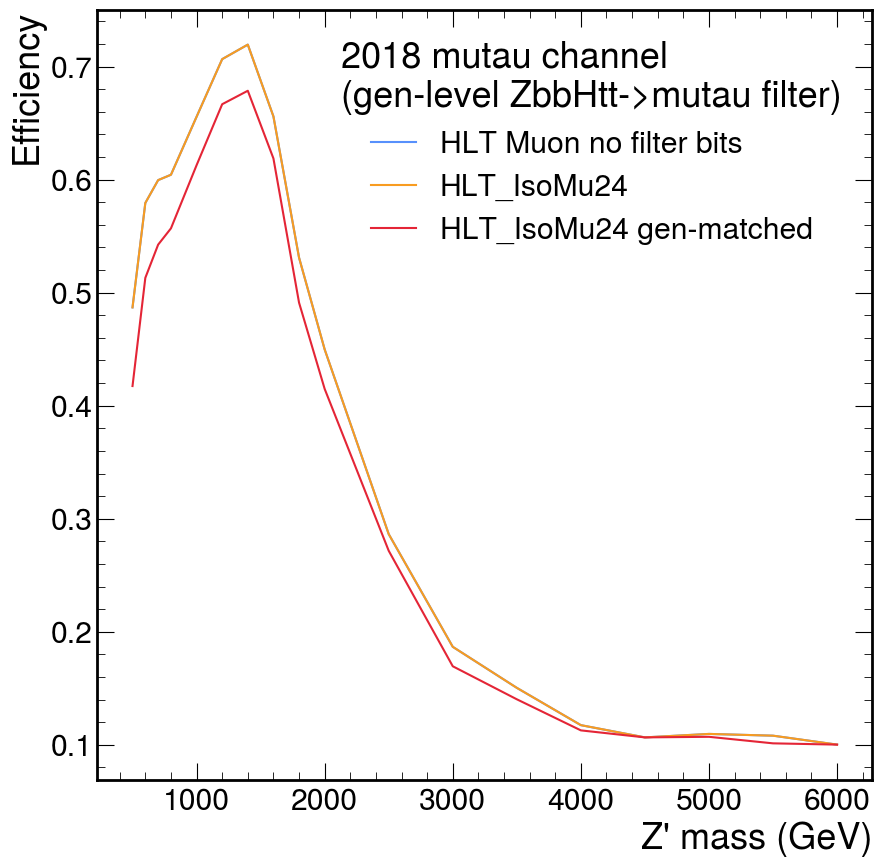

In [13]:
plt.plot(ars.keys(), eff_singlemu_trigger_noISO.values(), label="HLT Muon no filter bits")
plt.plot(ars.keys(), eff_singlemu_trigger.values(), label="HLT_IsoMu24")
plt.plot(ars.keys(), eff_singlemu_trigger_genmatched.values(), label="HLT_IsoMu24 gen-matched")
plt.xlabel("Z' mass (GeV)")
plt.ylabel("Efficiency")
#plt.text(0.95, 0.8, "", ha="right", va="top", transform = plt.gca().transAxes)
plt.legend(title="2018 mutau channel\n(gen-level ZbbHtt->mutau filter)")

(-0.040948963317384374, 1.1)

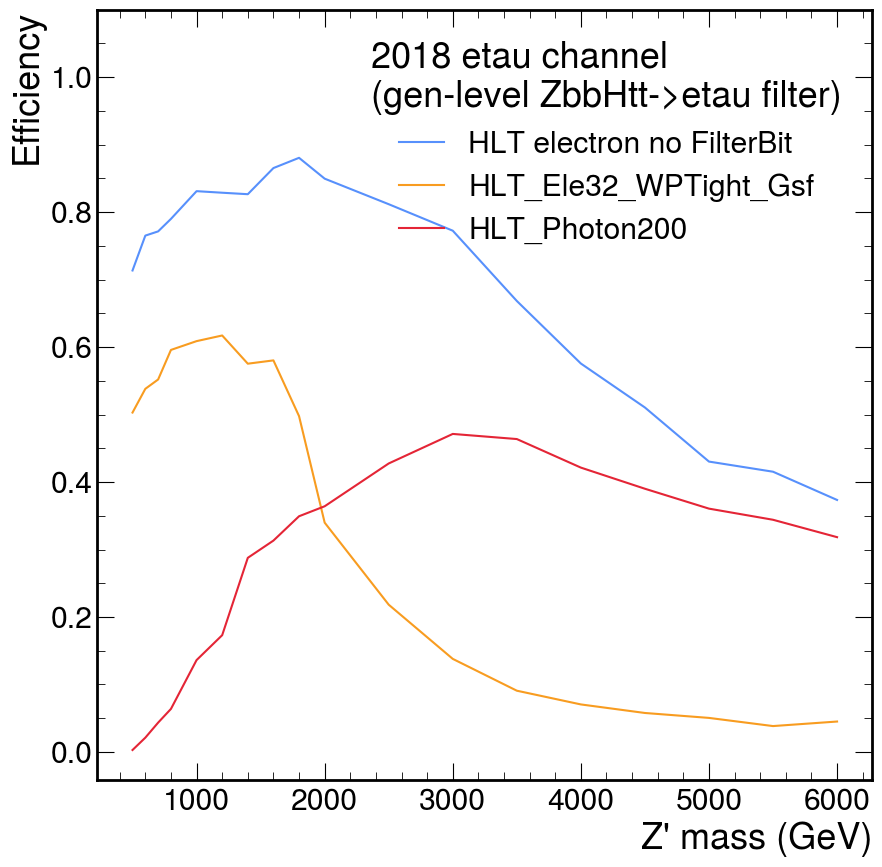

In [14]:
plt.plot(ars.keys(), eff_singleele_trigger_noISO.values(), label="HLT electron no FilterBit")
plt.plot(ars.keys(), eff_singleele_trigger.values(), label="HLT_Ele32_WPTight_Gsf")
plt.plot(ars.keys(), eff_singleele_trigger_photon200.values(), label="HLT_Photon200")
#plt.plot(ars.keys(), eff_singleele_trigger_genmatched.values(), label="HLT_Ele32_WPTight_Gsf gen-matched")
plt.xlabel("Z' mass (GeV)")
plt.ylabel("Efficiency")
#plt.text(0.95, 0.8, "etau channel (gen-level)", ha="right", va="top", transform = plt.gca().transAxes)
plt.legend(title="2018 etau channel\n(gen-level ZbbHtt->etau filter)")
plt.ylim(top=1.1)

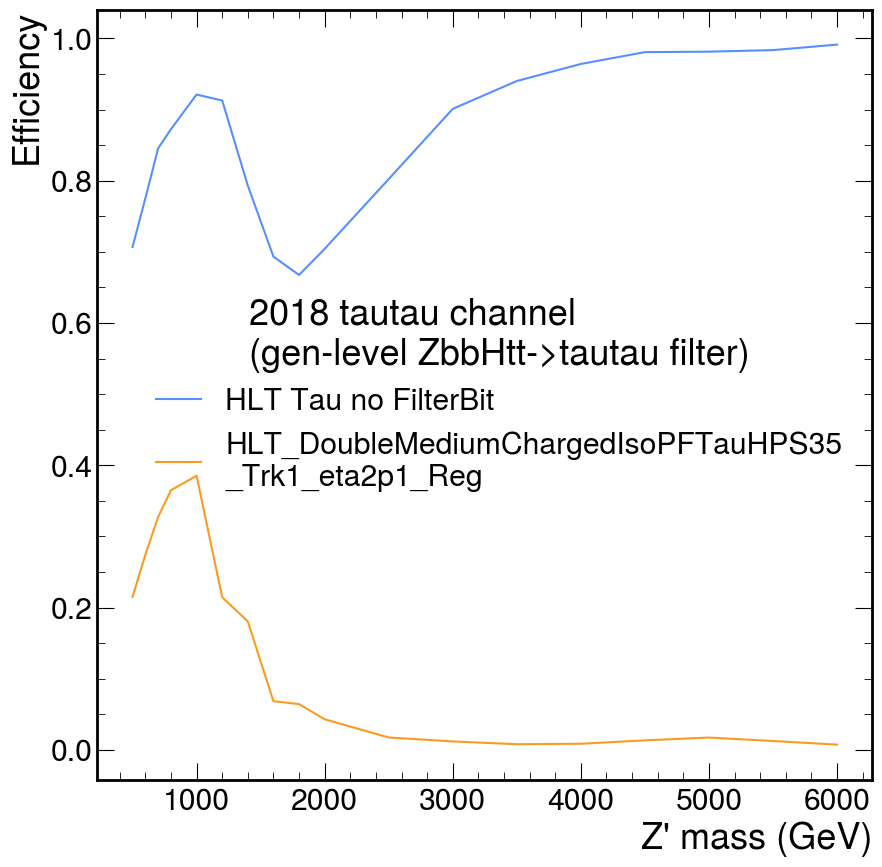

In [15]:
plt.plot(ars.keys(), eff_ditau_trigger_noFilterBits.values(), label="HLT Tau no FilterBit")
plt.plot(ars.keys(), eff_ditau_trigger.values(), label="HLT_DoubleMediumChargedIsoPFTauHPS35\n_Trk1_eta2p1_Reg")
# plt.plot(ars.keys(), eff_singlemu_trigger_genmatched.values(), label="HLT_IsoMu24 gen-matched")
plt.xlabel("Z' mass (GeV)")
plt.ylabel("Efficiency")
#plt.text(0.95, 0.8, "tautau channel (gen-level)", ha="right", va="top", transform = plt.gca().transAxes)
plt.legend(title="2018 tautau channel\n(gen-level ZbbHtt->tautau filter)")

### HLT paths

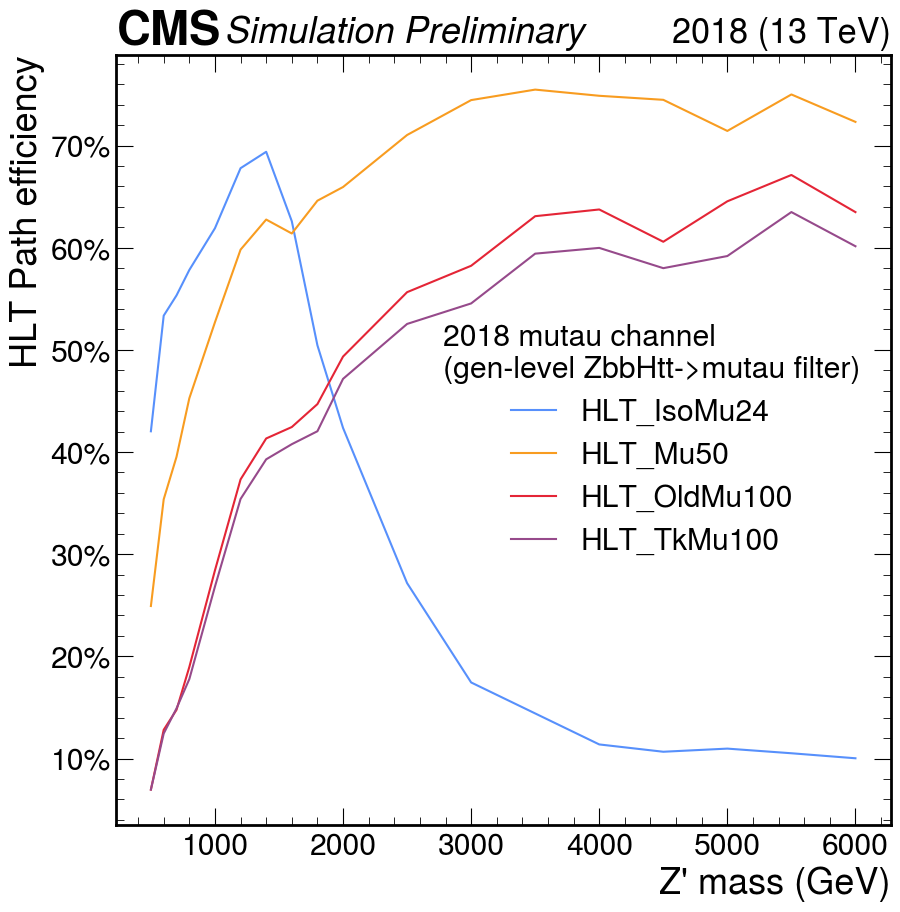

In [23]:
from collections import defaultdict
import matplotlib.ticker as mtick
eff_HLT = defaultdict(dict)
for hlt_path in ["HLT_IsoMu24", "HLT_Mu50", "HLT_OldMu100", "HLT_TkMu100"]:
    for mass, ar in ars.items():
        genMuTau = ar.genPairType == 0
        eff_HLT[hlt_path][mass] = ak.count_nonzero(genMuTau & ar[hlt_path]) / ak.count_nonzero(genMuTau)
    plt.plot(eff_HLT[hlt_path].keys(), eff_HLT[hlt_path].values(), label=hlt_path)
    
# plt.plot(ars.keys(), eff_singlemu_trigger_genmatched.values(), label="HLT_IsoMu24 gen-matched")
plt.xlabel("Z' mass (GeV)")
plt.ylabel("HLT Path efficiency")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="2018 mutau channel\n(gen-level ZbbHtt->mutau filter)")
hep.cms.label("Preliminary", year=2018)
plt.savefig("studies/cutflow/cutflow_HLT_muon_eff.pdf")

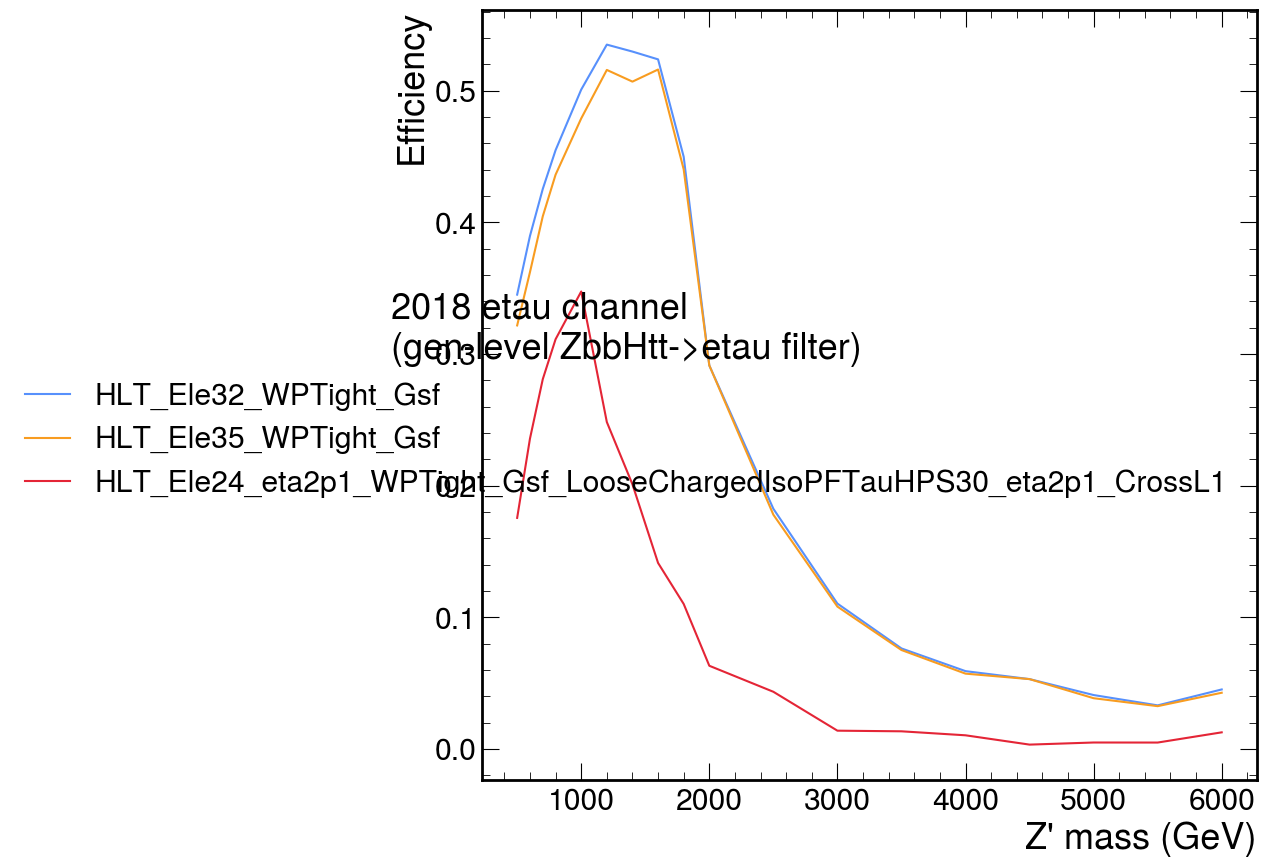

In [17]:

from collections import defaultdict
eff_HLT = defaultdict(dict)
for hlt_path in ["HLT_Ele32_WPTight_Gsf", "HLT_Ele35_WPTight_Gsf", "HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTauHPS30_eta2p1_CrossL1"]: #HLT_Photon200
    for mass, ar in ars.items():
        genMuTau = ar.genPairType == 1
        eff_HLT[hlt_path][mass] = ak.count_nonzero(genMuTau & ar[hlt_path]) / ak.count_nonzero(genMuTau)
    plt.plot(eff_HLT[hlt_path].keys(), eff_HLT[hlt_path].values(), label=hlt_path)
    
# plt.plot(ars.keys(), eff_singlemu_trigger_genmatched.values(), label="HLT_IsoMu24 gen-matched")
plt.xlabel("Z' mass (GeV)")
plt.ylabel("Efficiency")
plt.legend(title="2018 etau channel\n(gen-level ZbbHtt->etau filter)")

## RECO

In [24]:
###### RECO
def goodmuons_sel(ar):
    default_mask = (
            (ar.Muon.tightId == 1) &
            (abs(ar.Muon.eta) < 2.1) &
            (abs(ar.Muon.dxy) < 0.045) &
            (abs(ar.Muon.dz) < 0.2) &
            (ar.Muon.pfRelIso04_all < 0.15) &
            (ar.Muon.pt > 17)
        )
    return default_mask
# goodmuons = ar.Muon[goodmuons_sel(ar)]
# goodmuons


class DotDict(dict):
    __getattr__ = dict.__getitem__
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__
deeptau=DotDict(
    vsjet=DotDict(VVVLoose=1, VVLoose=2, VLoose=3, Loose=4, Medium=5,
        Tight=6, VTight=7, VVTight=8),
    vse=DotDict(VVVLoose=1, VVLoose=2, VLoose=3, Loose=4, Medium=5,
        Tight=6, VTight=7, VVTight=8),
    vsmu=DotDict(VLoose=1, Loose=1, Medium=3, Tight=4),
)
def goodtaus_sel(ar):
    base_mask = (
        #(abs(ar.Tau.eta) < max_eta) &
        (ar.Tau.pt > 20) &
        (abs(ar.Tau.dz) < 0.2) &
        ((ar.Tau.decayMode == 0) |(ar.Tau.decayMode == 1) |(ar.Tau.decayMode == 10) | (ar.Tau.decayMode == 11)) &
        (ar.Tau.idDeepTau2017v2p1VSe >= (deeptau.vse.VLoose ) &
        (ar.Tau.idDeepTau2017v2p1VSmu >= (deeptau.vsmu.Tight)) &
        (ar.Tau.idDeepTau2017v2p1VSjet >= deeptau.vsjet.VVVLoose))
    )
    return base_mask
# goodtaus = ar.Tau[goodtaus_sel(ar)]
# goodtaus 

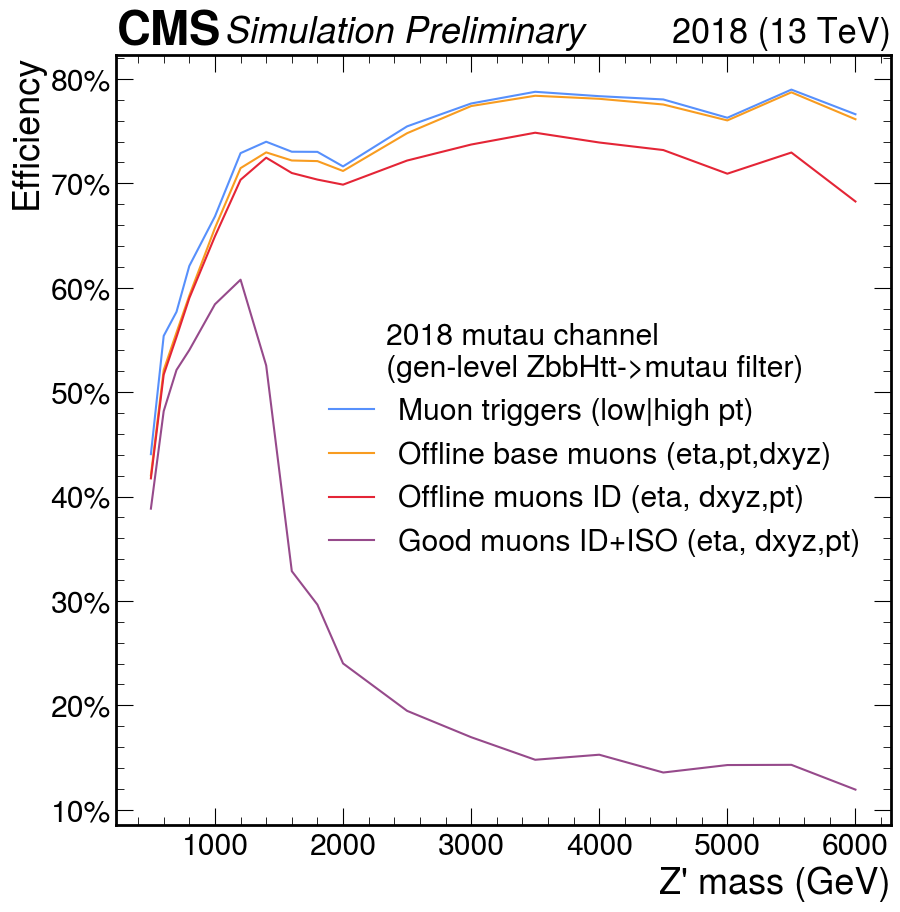

In [25]:

effs = defaultdict(dict)
mu_trigs = ["HLT_IsoMu24", "HLT_Mu50", "HLT_OldMu100", "HLT_TkMu100"]
for mass, ar in ars.items():
    genMuTau = ar.genPairType == 0
    
    pass_trig = ar[mu_trigs[0]]
    for trig in mu_trigs[1:]:
        pass_trig = pass_trig | (ar[trig])
    effs["Muon triggers (low|high pt)"][mass] = ak.count_nonzero(pass_trig & genMuTau) / ak.count_nonzero(genMuTau)

    muon_mask = (
        (ar.Muon.tightId == 1) &
        (abs(ar.Muon.eta) < 2.1) &
        (abs(ar.Muon.dxy) < 0.045) &
        (abs(ar.Muon.dz) < 0.2) &
        (ar.Muon.pfRelIso04_all < 0.15) &
        (ar.Muon.pt > 17)
    )
    effs["Offline base muons (eta,pt,dxyz)"][mass] = ak.count_nonzero((ak.count_nonzero((abs(ar.Muon.eta) < 2.1) &
        (abs(ar.Muon.dxy) < 0.045) &
        (abs(ar.Muon.dz) < 0.2) &(ar.Muon.pt > 17), axis=-1) >= 1) & genMuTau & pass_trig) / ak.count_nonzero(genMuTau)

    effs["Offline muons ID (eta, dxyz,pt)"][mass] = ak.count_nonzero((ak.count_nonzero((abs(ar.Muon.eta) < 2.1) &
        (abs(ar.Muon.dxy) < 0.045) &
        (abs(ar.Muon.dz) < 0.2) &(ar.Muon.pt > 17) &
        (ar.Muon.tightId == 1), axis=-1) >= 1) & genMuTau & pass_trig) / ak.count_nonzero(genMuTau)

    goodmuons = ar.Muon[goodmuons_sel(ar)]
    effs["Good muons ID+ISO (eta, dxyz,pt)"][mass] = ak.count_nonzero((ak.num(goodmuons) >= 1) & genMuTau & pass_trig) / ak.count_nonzero(genMuTau )
    
    # eff_singlemu_trigger_genmatched[mass] =ak.count_nonzero(singlemu_trigger_matchGen(ar[genMuTau], singlemu_trigger(ar[genMuTau]))) / ak.count_nonzero(genMuTau)

for key, val in effs.items():
    plt.plot(val.keys(), val.values(), label=key)
# plt.plot(ars.keys(), eff_singlemu_trigger_genmatched.values(), label="HLT_IsoMu24 gen-matched")
plt.xlabel("Z' mass (GeV)")
plt.ylabel("Efficiency")
plt.legend(title="2018 mutau channel\n(gen-level ZbbHtt->mutau filter)")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="2018 mutau channel\n(gen-level ZbbHtt->mutau filter)")
hep.cms.label("Preliminary", year=2018)
plt.savefig("studies/cutflow/cutflow_offline_muon_eff.pdf")

/opt/exp_soft/llr/python/3.11.8/el7/lib/python3.11/site-packages/mplhep/plot.py:592: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks)


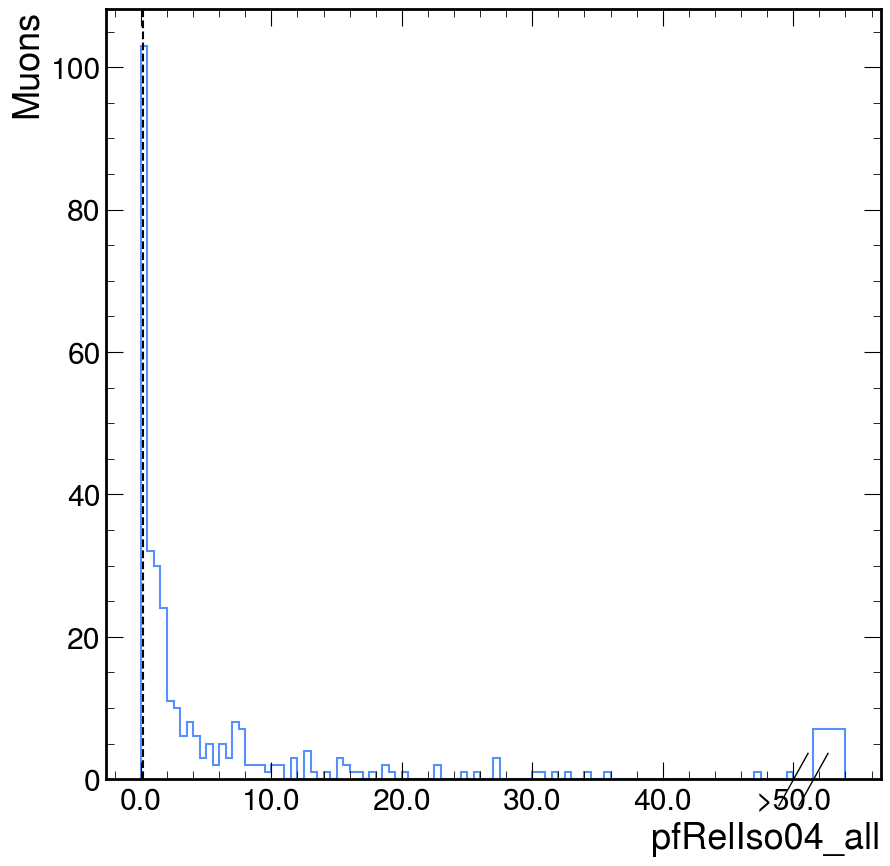

In [20]:
ar = ars[5000]
genMuTau = ar.genPairType == 0
    
pass_trig = ar[mu_trigs[0]]
for trig in mu_trigs[1:]:
    pass_trig = pass_trig | (ar[trig])

muon_mask = (
    (ar.Muon.tightId == 1) &
    (abs(ar.Muon.eta) < 2.1) &
    (abs(ar.Muon.dxy) < 0.045) &
    (abs(ar.Muon.dz) < 0.2) &
    #(ar.Muon.pfRelIso04_all < 0.15) &
    (ar.Muon.pt > 17)
)
h_muIso = hist.Hist(hist.axis.Regular(100, 0., 50,))
h_muIso.fill(ak.flatten(ar.Muon[genMuTau & pass_trig & muon_mask].pfRelIso04_all))
hep.histplot(h_muIso, yerr=False, flow="show")
plt.xlabel("pfRelIso04_all")
plt.ylabel("Muons")
plt.axvline(0.15, color="black", ls="--")

In [21]:

goodmuons

<Array [[], [], [], [], ..., [], [], [], []] type='1910 * var * {charge: in...'>